In [ ]:
!pip uninstall gym -y
!pip install gym[box2d]
!pip install gym[classic_control]
!pip install sb3-contrib
!pip install stable-baselines3
!pip install tqdm
'''
Using https://sb3-contrib.readthedocs.io/en/master/modules/trpo.html for TRPO algo implementation
'''

Found existing installation: gym 0.26.2
Uninstalling gym-0.26.2:
  Successfully uninstalled gym-0.26.2
  Using cached gym-0.26.2-py3-none-any.whl


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 1.6.2 requires gym==0.21, but you have gym 0.26.2 which is incompatible.


  Using cached gym-0.21.0-py3-none-any.whl
  Attempting uninstall: gym
    Found existing installation: gym 0.26.2
    Uninstalling gym-0.26.2:
      Successfully uninstalled gym-0.26.2


In [61]:
# import numpy as np
# import gym
# import torch
# import torch.optim as optim
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.distributions as D

In [1]:
import gym
import matplotlib.pyplot as plt
from sb3_contrib import TRPO
from IPython import display as ipythondisplay
from stable_baselines3.common.evaluation import evaluate_policy
print(gym.__version__)

0.21.0


In [2]:
env = gym.make('LunarLanderContinuous-v2')
env.reset()
print("sample action: ", env.action_space.sample())
print("Obsevation space action: ", env.observation_space.shape)
print("sample observation: ", env.observation_space.sample())

sample action:  [-0.57857805 -0.69983536]
Obsevation space action:  (8,)
sample observation:  [-0.9548844   1.0385627   0.65699613  0.7407704   1.3933494   0.4792029
 -1.7526177  -0.66273016]


In [4]:
model = TRPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=2048, log_interval=4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


KeyboardInterrupt: 

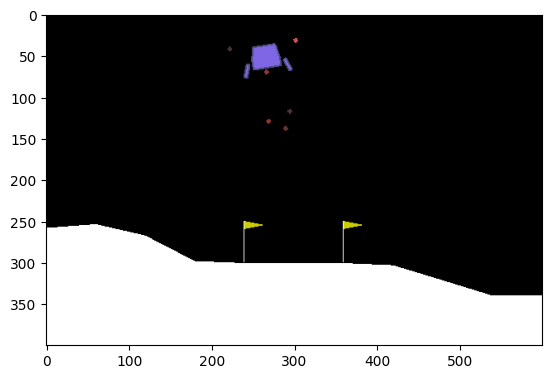

In [5]:
#Testing random walks
img = plt.imshow(env.render('rgb_array')) # only call this once
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

episodes = 10
for ep in range(episodes):
    obs = env.reset()
    done = False
    while not done:
        obs, reward, done, info = env.step(env.action_space.sample())
        #for display
        screen = env.render(mode='rgb_array')
        plt.imshow(screen)
        ipythondisplay.clear_output(wait=True)
        ipythondisplay.display(plt.gcf())
    if done:
        break

ipythondisplay.clear_output(wait=True)
env.close()

In [82]:
evaluate_policy(model, env, n_eval_episodes=10)

(-41.56011841564614, 65.61546782468425)

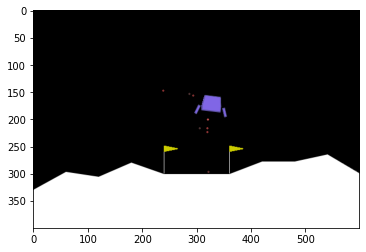

In [ ]:
img = plt.imshow(env.render('rgb_array')) # only call this once
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

obs = env.reset()
while True:
  action, states = model.predict(obs)
  obs, rewards, done, info = env.step(action)
    #for display
  screen = env.render(mode='rgb_array')
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

ipythondisplay.clear_output(wait=True)
env.close()